Example 4.3: Gambler’s Problem A gambler has the opportunity to make bets on
the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many
dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends
when the gambler wins by reaching his goal of $100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite

MDP. The state is the gambler’s capital, s 2 {1, 2,..., 99} and the actions
are stakes, a 2 {0, 1,..., min(s, 100
s)}. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.
The state-value function then gives
the probability of winning from each
state. A policy is a mapping from
levels of capital to stakes. The optimal policy maximizes the probability
of reaching the goal. Let ph denote
the probability of the coin coming up
heads. If ph is known, then the entire problem is known and it can be
solved, for instance, by value iteration.
Figure 4.3 shows the change in the
value function over successive sweeps
of value iteration, and the final policy
found, for the case of ph = 0.4. This
policy is optimal, but not unique. In
fact, there is a whole family of optimal policies, all corresponding to ties
for the argmax action selection with
respect to the optimal value function.
Can you guess what the entire family
looks like?

In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# goal
GOAL = 100 # 6

# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)

# probability of head
HEAD_PROB = 0.55

In [58]:
# state value
state_value = np.zeros(GOAL + 1)
state_value[GOAL] = 1.0

# value iteration
while True:
    delta = 0.0
    for state in STATES[1:GOAL]:
        # get possible actions for current state
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(
                HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])
        new_value = np.max(action_returns)
        delta += np.abs(state_value[state] - new_value)
        # update state value
        state_value[state] = new_value
    if delta < 1e-9:
        break

Text(0, 0.5, 'Final policy (stake)')

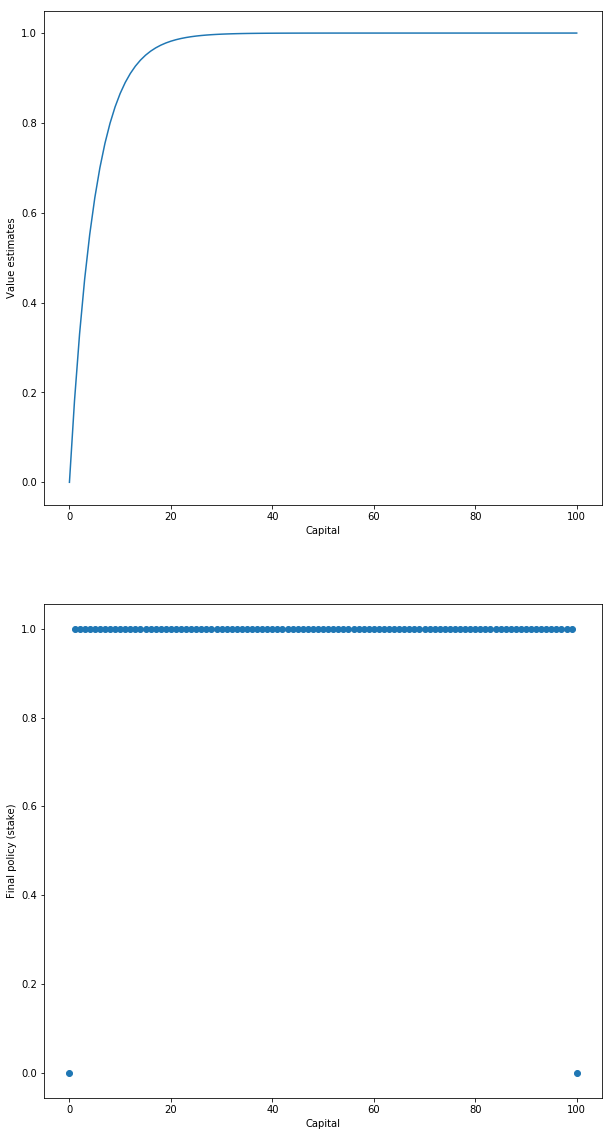

In [59]:
# compute the optimal policy
policy = np.zeros(GOAL + 1)
for state in STATES[1:GOAL]:
    actions = np.arange(min(state, GOAL - state) + 1)
    action_returns = []
    for action in actions:
        action_returns.append(
            HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])

    # round to resemble the figure in the book, see
    # https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/issues/83
    # print (state, action_returns[1:], action_returns[::-1][:-1])
    policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]

plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
plt.plot(state_value)
plt.xlabel('Capital')
plt.ylabel('Value estimates')

plt.subplot(2, 1, 2)
plt.scatter(STATES, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')

# plt.savefig('../images/figure_4_3.png')
# plt.close()

Text(0, 0.5, 'Final policy (stake)')

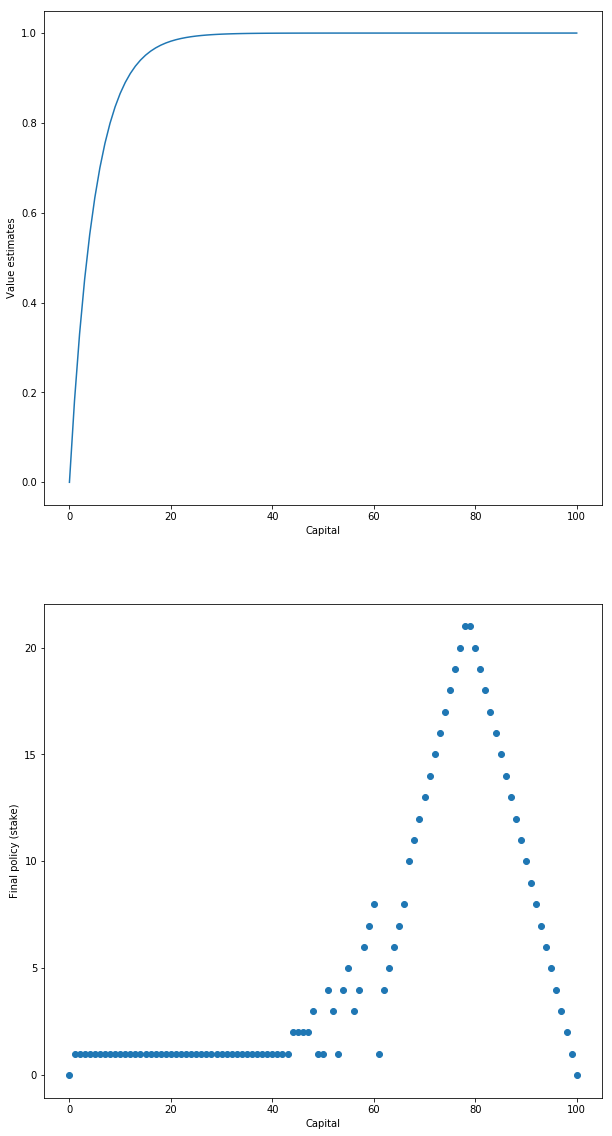

In [60]:
# argmax resolution - last occurence instead of the first one

# compute the optimal policy
policy = np.zeros(GOAL + 1)
for state in STATES[1:GOAL]:
    actions = np.arange(min(state, GOAL - state) + 1)
    action_returns = []
    for action in actions:
        action_returns.append(
            HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])

    # round to resemble the figure in the book, see
    # https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/issues/83
    # print (state, action_returns[1:])
    action_returns_rev = action_returns[::-1]
    i = len(action_returns_rev) - np.argmax(np.round(action_returns_rev[:-1], 5)) - 1
    # print (state, i)
    policy[state] = actions[i]
    # policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]

plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
plt.plot(state_value)
plt.xlabel('Capital')
plt.ylabel('Value estimates')

plt.subplot(2, 1, 2)
plt.scatter(STATES, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')

# plt.savefig('../images/figure_4_3.png')
# plt.close()

In [4]:
figure_4_3()